#### Gramener Case Study

    Business Objectives:-
    
        This company is the largest online loan marketplace, facilitating personal loans, business loans, 
        and financing of medical procedures. Borrowers can easily access lower interest rate loans 
        through a fast online interface.

        The company wants to understand the driving factors (or driver variables) behind loan default, 
        i.e. the variables which are strong indicators of default.  
        The company can utilise this knowledge for its portfolio and risk assessment. 

    #1. Importing data and libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


C:\Users\lenovo\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\lenovo\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\lenovo\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\lenovo\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Use

In [2]:
loan  = pd.read_csv('loan.csv')

C:\Users\lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


    #2. Exploring data

In [3]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
no_of_null = pd.DataFrame(loan.isnull().sum(axis=0)).reset_index()
no_of_null.rename(columns={ no_of_null.columns[0]: "Attributes",no_of_null.columns[1]: "NoOfNulls"},inplace=True)

In [6]:
#Taking columns where 80% of the data is NULL
no_of_null[no_of_null['NoOfNulls'] > 25000]

,Attributes,NoOfNulls
28,mths_since_last_delinq,25682
29,mths_since_last_record,36931
47,next_pymnt_d,38577
50,mths_since_last_major_derog,39717
53,annual_inc_joint,39717
54,dti_joint,39717
55,verification_status_joint,39717
57,tot_coll_amt,39717
58,tot_cur_bal,39717
59,open_acc_6m,39717


In [7]:
loan.drop(['mths_since_last_delinq','mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'],axis=1,inplace=True)

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [9]:
pandas_profiling.ProfileReport(loan)

Number of variables,54
Number of observations,39717
Total Missing (%),0.8%
Total size in memory,16.4 MiB
Average record size in memory,432.0 B
Numeric,17
Categorical,19
Boolean,3
Date,0
Text (Unique),1
Rejected,14


    Deleting the follwing columns because:-
    
    'pub_rec' has 37601 / 94.7% zeros Zeros
    'collection_recovery_fee' has 35935 / 90.5% zeros Zeros
    'delinq_2yrs' has 35405 / 89.1% zeros Zeros
    'out_prncp' has 38577 / 97.1% zeros Zeros
    'pub_rec_bankruptcies' has 37339 / 94.0% zeros Zeros
    'recoveries' has 35499 / 89.4% zeros Zeros
    'total_rec_late_fee' has 37671 / 94.8% zeros Zeros    
    'emp_title' has a high cardinality: 28821 distinct values
    'installment' is highly correlated with loan_amnt (ρ = 0.93029) Rejected
    'acc_now_delinq' has constant value 0 Rejected
    'application_type' has constant value INDIVIDUAL Rejected
    'delinq_amnt' has constant value 0 Rejected
    'desc' has a high cardinality: 26528 distinct values Warning
    'funded_amnt' is highly correlated with loan_amnt (ρ = 0.98158) Rejected
    'funded_amnt_inv' is highly correlated with funded_amnt (ρ = 0.95842) Rejected
    'initial_list_status' has constant value f Rejected
    'member_id'is highly correlated with id (ρ = 0.99365) Rejected
    'out_prncp_inv' is highly correlated with out_prncp (ρ = 0.99983) Rejected
    'policy_code' has constant value 1 Rejected
    'pymnt_plan' has constant value n Rejected
    'total_pymnt_inv' is highly correlated with total_pymnt (ρ = 0.97081) Rejected
    'total_rec_prncp' is highly correlated with total_pymnt_inv (ρ = 0.93958) Rejected

In [10]:
loan.drop(['pub_rec','collection_recovery_fee','delinq_2yrs','out_prncp','pub_rec_bankruptcies','recoveries','total_rec_late_fee','emp_title','installment','acc_now_delinq','application_type','delinq_amnt','desc','funded_amnt','funded_amnt_inv','initial_list_status','member_id','out_prncp_inv','policy_code','pymnt_plan','total_pymnt_inv','total_rec_prncp'],axis=1,inplace=True)

In [11]:
no_of_null = pd.DataFrame(loan.isnull().sum(axis=0)).reset_index()
no_of_null.rename(columns={ no_of_null.columns[0]: "Attributes",no_of_null.columns[1]: "NoOfNulls"},inplace=True)

In [12]:
no_of_null[no_of_null['NoOfNulls'] > 0]

,Attributes,NoOfNulls
6,emp_length,1075
14,title,11
22,revol_util,50
26,last_pymnt_d,71
28,last_credit_pull_d,2
29,collections_12_mths_ex_med,56
30,chargeoff_within_12_mths,56
31,tax_liens,39


    We can drop the following columns since they are either 'NA' or 0 -

    collections_12_mths_ex_med
    chargeoff_within_12_mths
    tax_liens 
    
    Columns - 'title' and 'purpose' are nothing but same with different name
    So we can drop 'title'

In [13]:
loan.drop(['title','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis=1, inplace = True)

    Working on 'revol_util':-
    
        Revolving utilization, also known as your “debt-to-limit ratio” or “credit utilization,” 
        measures the amount of your revolving credit limits that you are currently using.
        
        There are two unique values for 'revol_bal' revol_util is null
        Value1: 0
        Value2: 49238
        
        By defination of revol_utilization, so we can assume when 'revol_bal' is zero 'revol_util' is also ZERO.
        For 'revol_bal' 49238, we can replace that with 93.50 - since we find the same utilization for another 49238

In [14]:
loan['revol_util'] = loan[['revol_util']].replace('%', '', regex=True)
loan['revol_util'] = loan['revol_util'].astype('float64')

In [15]:
loan[loan['revol_util'].isnull()].nunique()

id                     50
loan_amnt              32
term                    2
int_rate               39
grade                   6
sub_grade              19
emp_length             10
home_ownership          4
annual_inc             38
verification_status     3
issue_d                28
loan_status             2
url                    50
purpose                12
zip_code               45
addr_state             26
dti                    43
earliest_cr_line       40
inq_last_6mths          4
open_acc               11
revol_bal               2
revol_util              0
total_acc              18
total_pymnt            50
total_rec_int          47
last_pymnt_d           35
last_pymnt_amnt        47
last_credit_pull_d     36
dtype: int64

In [16]:
loan.loc[loan['revol_bal'] == 49238]

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
5820,977981,17625,60 months,23.91%,G,G4,2 years,MORTGAGE,400000.0,Verified,...,0,27,49238,93.5,60,20896.160000,10541.99,Feb-15,506.12,Aug-15
37540,377376,5000,36 months,16.95%,E,E5,5 years,MORTGAGE,110000.0,Verified,...,0,5,49238,NaN,22,6412.768458,1412.77,Mar-12,182.11,Feb-12


In [17]:
loan['revol_util'] = loan.loc[loan['revol_bal'] == 49238][['revol_util']].replace(np.nan, 93.5, regex=True)

In [18]:
loan['revol_util'] = loan[['revol_util']].replace(np.nan, 0.0, regex=True)

In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
id                     39717 non-null int64
loan_amnt              39717 non-null int64
term                   39717 non-null object
int_rate               39717 non-null object
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null object
loan_status            39717 non-null object
url                    39717 non-null object
purpose                39717 non-null object
zip_code               39717 non-null object
addr_state             39717 non-null object
dti                    39717 non-null float64
earliest_cr_line       39717 non-null object
inq_last_6mths         39717 non-null int64
open_acc               39717 non-null

In [20]:
loan.to_csv('loan_2.csv')

In [21]:
#term column treatment -
loan['term'] = loan['term'].replace('months', '', regex=True)
loan['term'] = loan['term'].astype('int64')

In [22]:
#int_rate column treatment -
loan['int_rate'] = loan['int_rate'].replace('%', '', regex=True)
loan['int_rate'] = loan['int_rate'].astype('float64')

In [23]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
id                     39717 non-null int64
loan_amnt              39717 non-null int64
term                   39717 non-null int64
int_rate               39717 non-null float64
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null object
loan_status            39717 non-null object
url                    39717 non-null object
purpose                39717 non-null object
zip_code               39717 non-null object
addr_state             39717 non-null object
dti                    39717 non-null float64
earliest_cr_line       39717 non-null object
inq_last_6mths         39717 non-null int64
open_acc               39717 non-null

In [24]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,5000,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,...,1,3,13648,0.0,9,5863.155187,863.16,Jan-15,171.62,May-16
1,1077430,2500,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,...,5,3,1687,0.0,4,1008.710000,435.17,Apr-13,119.66,Sep-13
2,1077175,2400,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,...,2,2,2956,0.0,10,3005.666844,605.67,Jun-14,649.91,May-16
3,1076863,10000,36,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,...,1,10,5598,0.0,37,12231.890000,2214.92,Jan-15,357.48,Apr-16
4,1075358,3000,60,12.69,B,B5,1 year,RENT,80000.0,Source Verified,...,0,15,27783,0.0,38,3513.330000,1037.39,May-16,67.79,May-16


In [25]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [26]:
loan_work = loan[(loan.loan_status == 'Fully Paid') | (loan.loan_status == 'Charged Off')]

In [27]:
loan_current = loan[(loan.loan_status == 'Current')]

    ************ We will work with loan_work ************

In [28]:
loan_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
id                     38577 non-null int64
loan_amnt              38577 non-null int64
term                   38577 non-null int64
int_rate               38577 non-null float64
grade                  38577 non-null object
sub_grade              38577 non-null object
emp_length             37544 non-null object
home_ownership         38577 non-null object
annual_inc             38577 non-null float64
verification_status    38577 non-null object
issue_d                38577 non-null object
loan_status            38577 non-null object
url                    38577 non-null object
purpose                38577 non-null object
zip_code               38577 non-null object
addr_state             38577 non-null object
dti                    38577 non-null float64
earliest_cr_line       38577 non-null object
inq_last_6mths         38577 non-null int64
open_acc               38577 non-null

In [29]:
loan_work.isnull().any()

id                     False
loan_amnt              False
term                   False
int_rate               False
grade                  False
sub_grade              False
emp_length              True
home_ownership         False
annual_inc             False
verification_status    False
issue_d                False
loan_status            False
url                    False
purpose                False
zip_code               False
addr_state             False
dti                    False
earliest_cr_line       False
inq_last_6mths         False
open_acc               False
revol_bal              False
revol_util             False
total_acc              False
total_pymnt            False
total_rec_int          False
last_pymnt_d            True
last_pymnt_amnt        False
last_credit_pull_d      True
dtype: bool

In [30]:
loan_work['emp_length'] = loan_work['emp_length'].replace(np.nan, 'Not Availible', regex=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
loan_work.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,5000,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,...,1,3,13648,0.0,9,5863.155187,863.16,Jan-15,171.62,May-16
1,1077430,2500,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,...,5,3,1687,0.0,4,1008.710000,435.17,Apr-13,119.66,Sep-13
2,1077175,2400,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,...,2,2,2956,0.0,10,3005.666844,605.67,Jun-14,649.91,May-16
3,1076863,10000,36,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,...,1,10,5598,0.0,37,12231.890000,2214.92,Jan-15,357.48,Apr-16
5,1075269,5000,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,...,3,9,7963,0.0,12,5632.210000,632.21,Jan-15,161.03,Jan-16


In [32]:
import statsmodels.formula.api as sm
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
%matplotlib inline

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
#Defination
def loanstatus(loan_work):
    if ((loan_work.loan_status == 'Fully Paid')):
        return 0
    else:
        return 1

In [34]:
loan_work['loan_status_cat'] = loan_work.apply(loanstatus, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
loan_work.drop(['loan_status'],axis=1, inplace = True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
loan_work.drop(['id','url'],axis=1, inplace = True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
cat_list = []
num_list = []

for variable in loan_work.columns:
    if loan_work[variable].dtype.name in ['object']:
        cat_list.append(variable)
    else:
        num_list.append(variable)

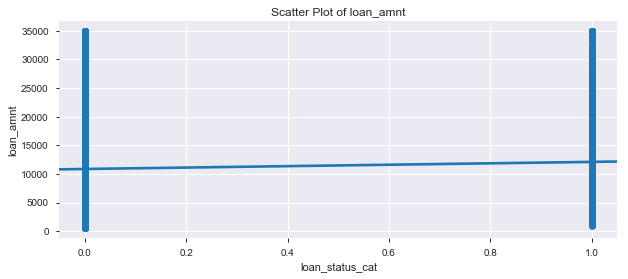

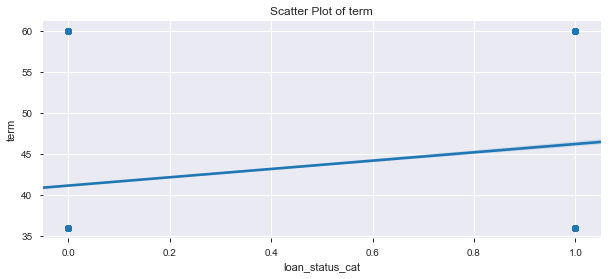

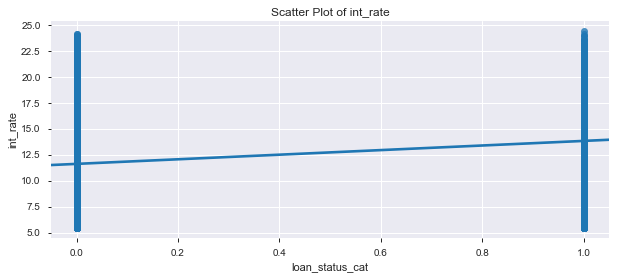

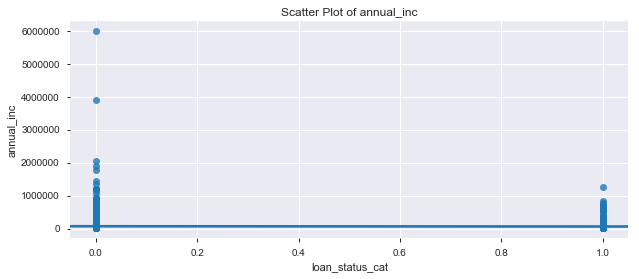

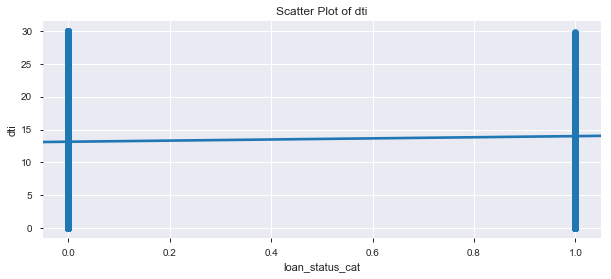

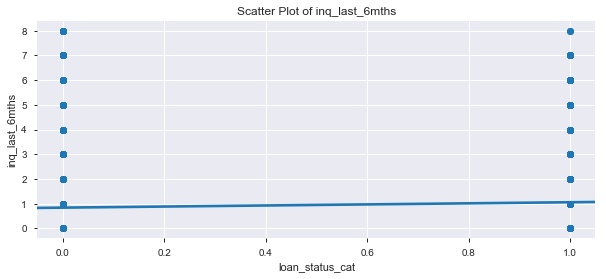

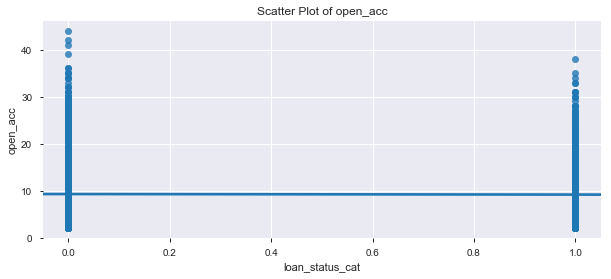

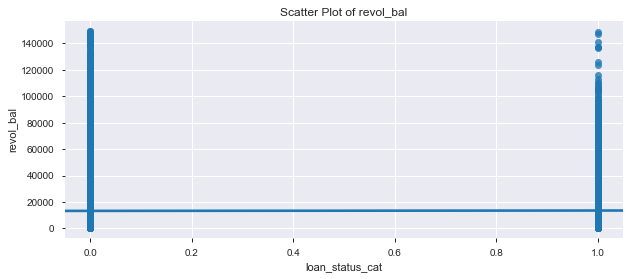

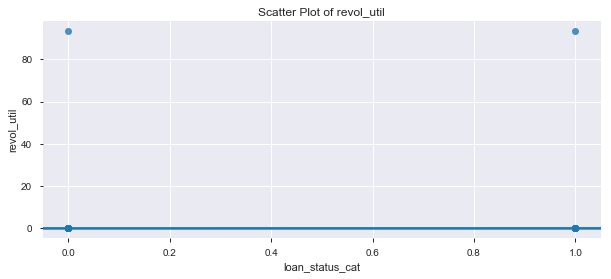

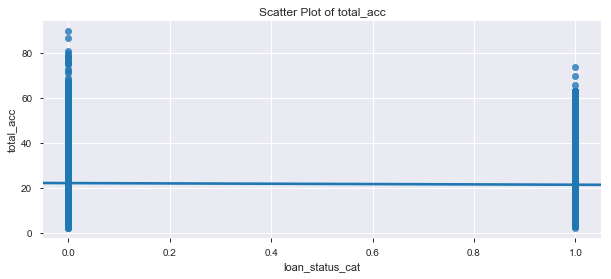

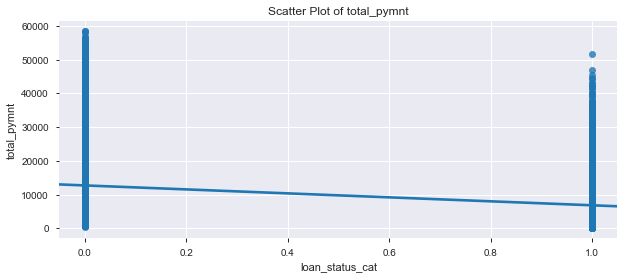

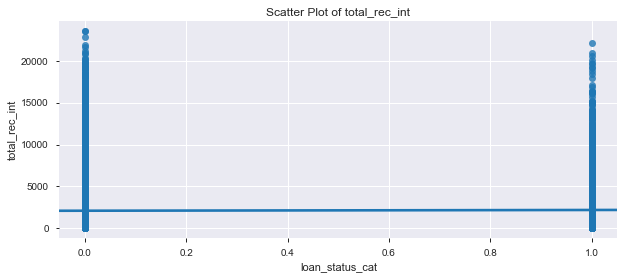

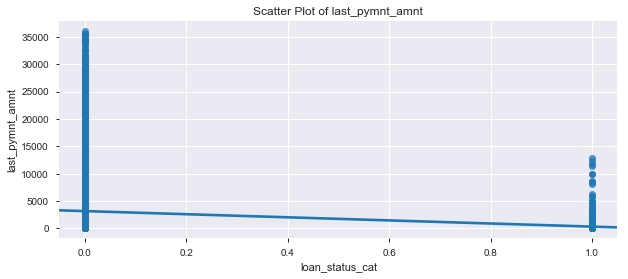

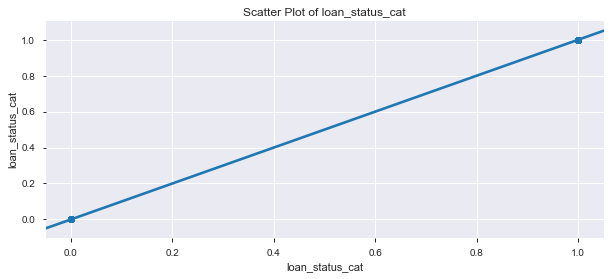

In [71]:
bp = PdfPages('BoxPlots with Total View.pdf')

for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.regplot(y=num_variable, x='loan_status_cat', data = loan_work)
    plt.title(str('Scatter Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


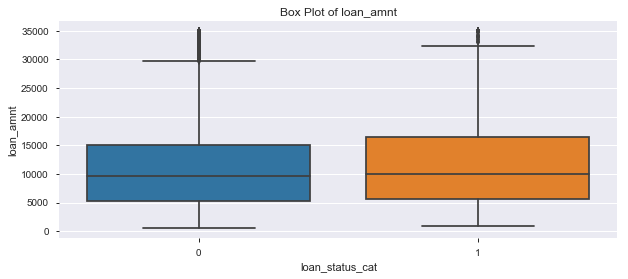

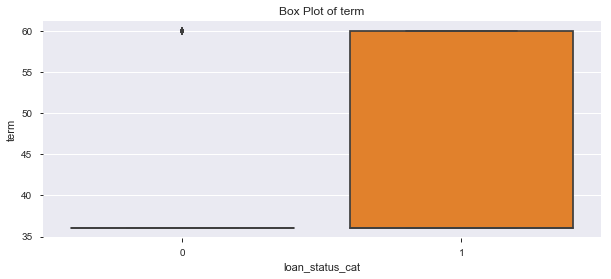

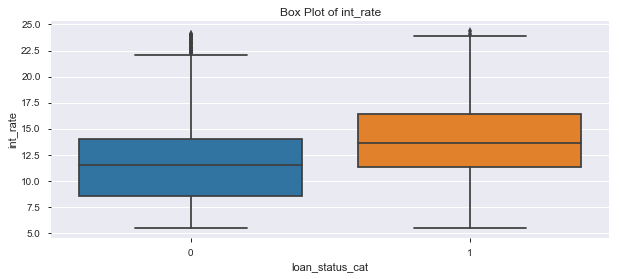

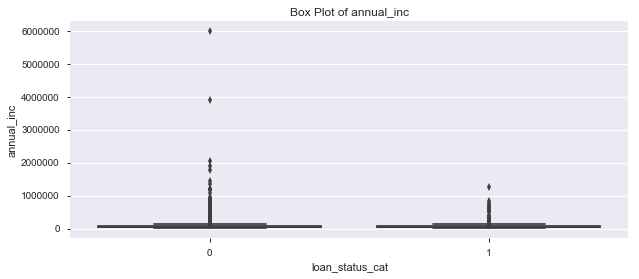

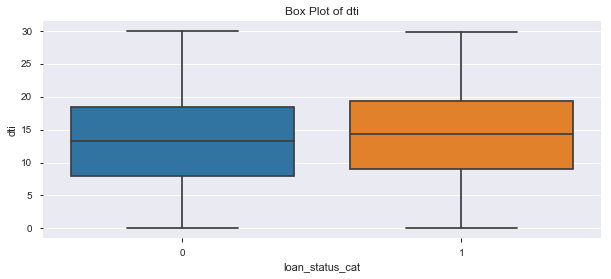

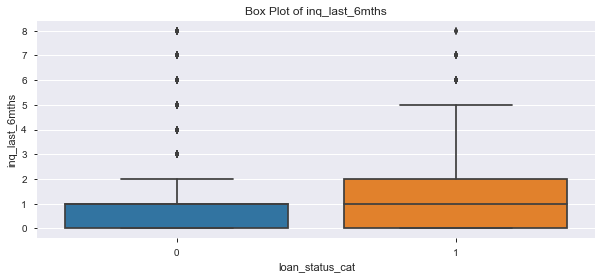

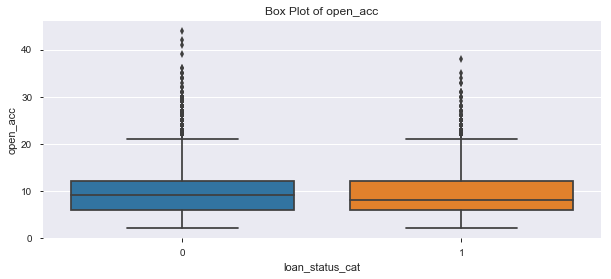

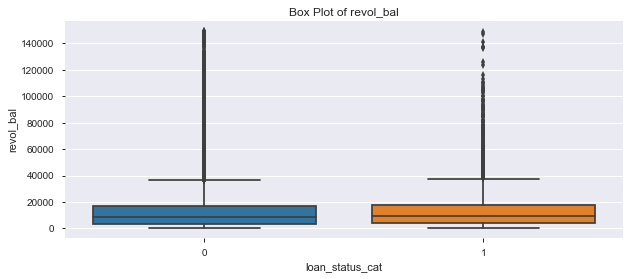

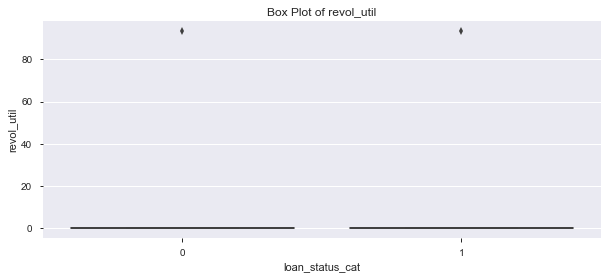

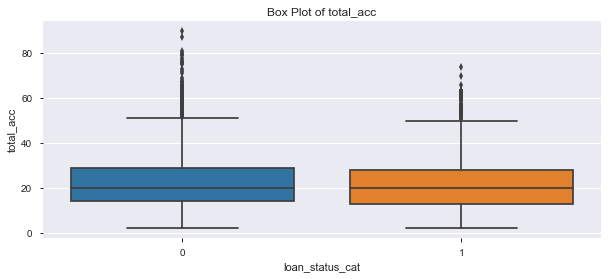

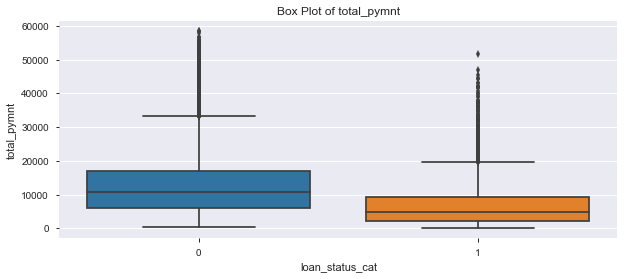

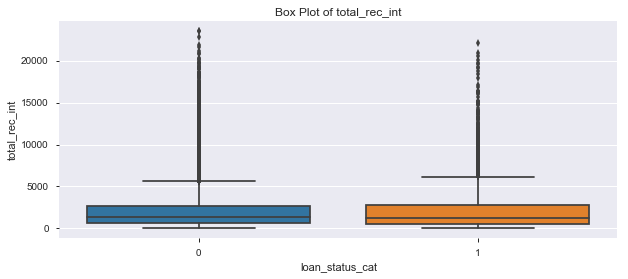

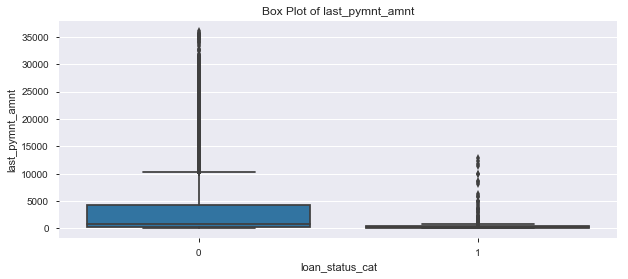

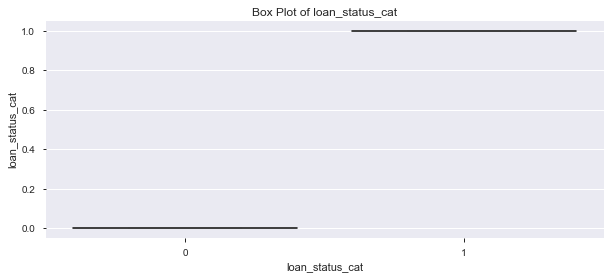

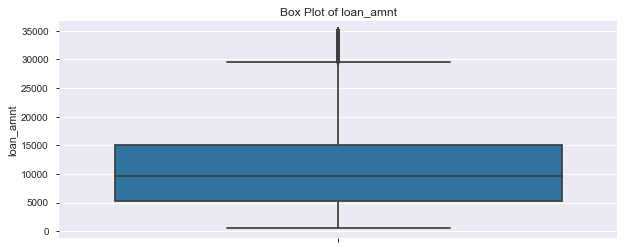

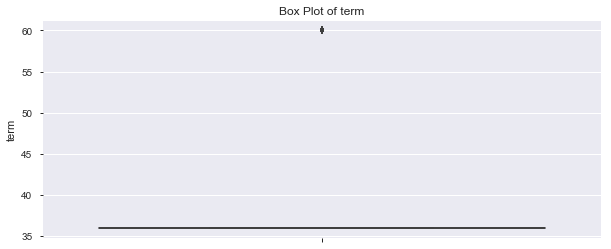

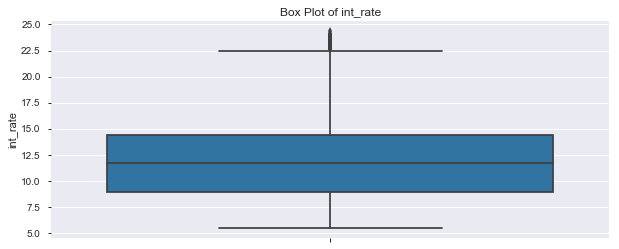

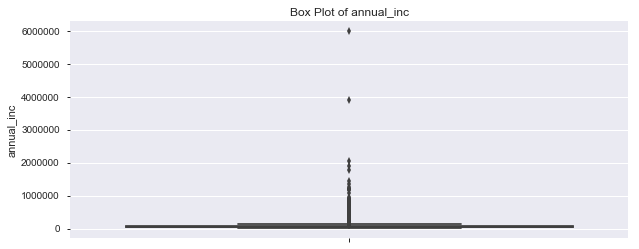

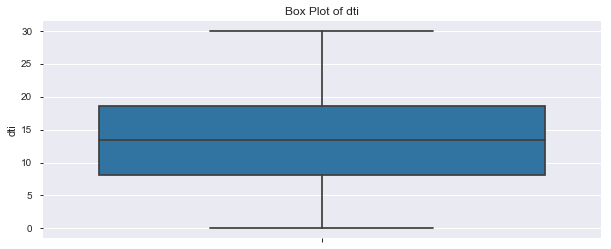

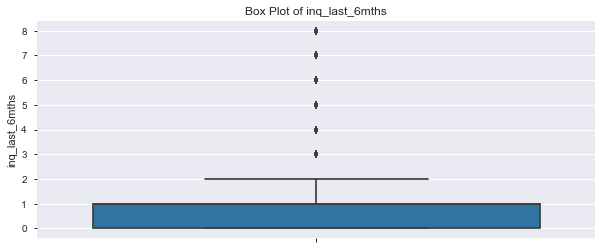

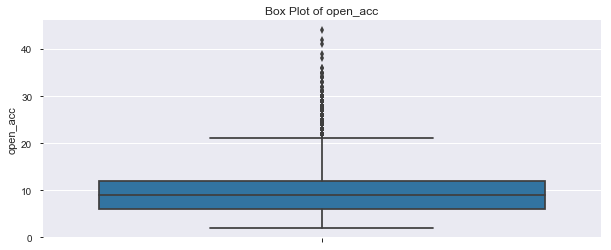

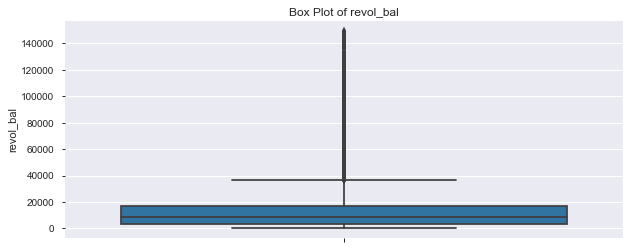

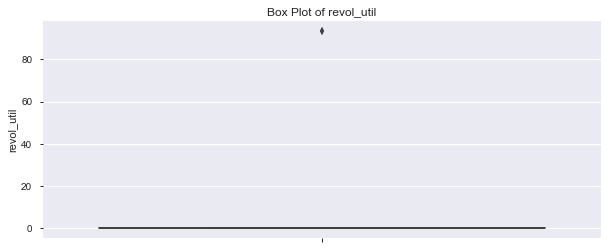

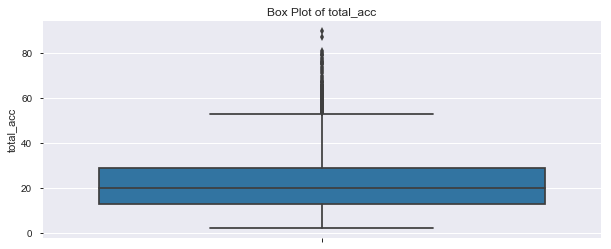

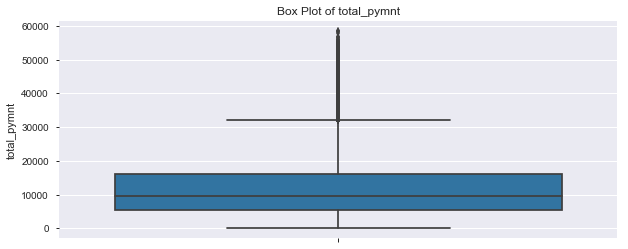

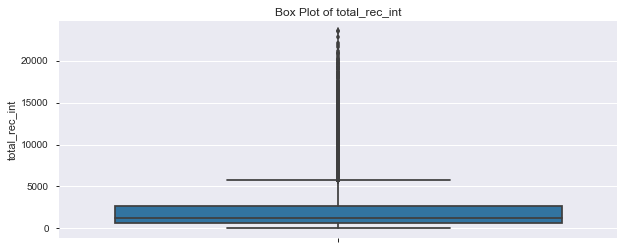

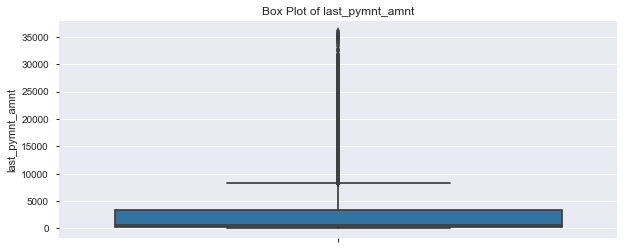

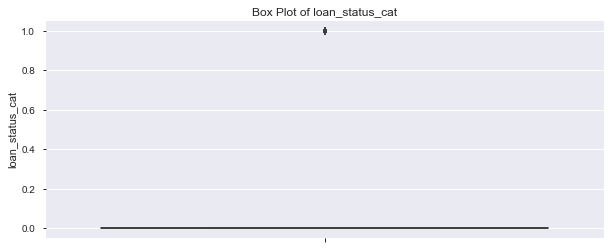

In [38]:
bp = PdfPages('BoxPlots withSplit.pdf')

for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='loan_status_cat', y=num_variable, data = loan_work)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

bp = PdfPages('BoxPlots with Total View.pdf')

for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(y=num_variable, data = loan_work)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

In [327]:
## Categorical Variable
chisq_df = pd.DataFrame()
for cat_variable in cat_list:
    cross_tab = pd.crosstab(loan_work[cat_variable],loan_work['loan_status_cat'], margins=False)
    stats.chi2_contingency(observed=cross_tab)[1]
    temp = pd.DataFrame([cat_variable,stats.chi2_contingency(observed=cross_tab)[0],stats.chi2_contingency(observed=cross_tab)[1] ]).T
    temp.columns = ['Variable', 'ChiSquare','P-Value']
    chisq_df = pd.concat([chisq_df, temp], axis=0, ignore_index=True)
    
print(chisq_df, '\n')

## Numerical Variable
tstats_df = pd.DataFrame()
for num_variable in num_list:
    tstats = stats.ttest_ind(loan_work[loan_work['loan_status_cat']==1][num_variable],loan_work[loan_work['loan_status_cat']==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df)

               Variable ChiSquare       P-Value
0                 grade   1581.19             0
1             sub_grade   1689.07             0
2            emp_length   69.5847   1.46508e-10
3        home_ownership   22.2329   0.000180117
4   verification_status   89.8557    3.0767e-20
5               issue_d   210.904    2.0786e-20
6                   url     38577      0.497606
7               purpose   378.944   6.21396e-73
8              zip_code   1090.97   6.69541e-10
9            addr_state   159.415   1.30917e-13
10     earliest_cr_line   592.952     0.0181411
11         last_pymnt_d   1899.42             0
12   last_credit_pull_d   1594.04  1.84067e-264 

      Variable Name T-Statistic       P-Value
0         loan_amnt     11.6995   1.45033e-31
1              term     34.5983  2.43151e-258
2          int_rate     42.4781             0
3        annual_inc    -8.03324   9.76051e-16
4               dti     8.86251   8.15008e-19
5    inq_last_6mths     14.1538   2.29931e-45
6   

In [49]:
#we can drop url since it has p-value of 0.49 high value; rest all are low value so as to reject null hypothesis

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


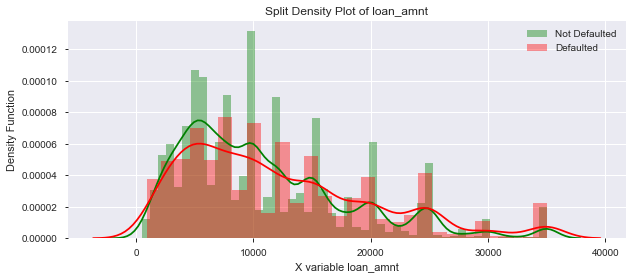

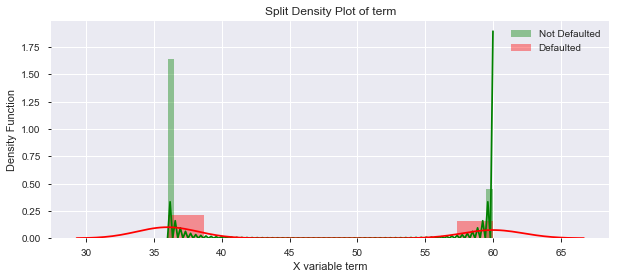

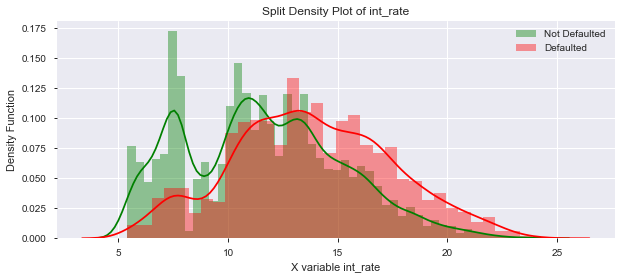

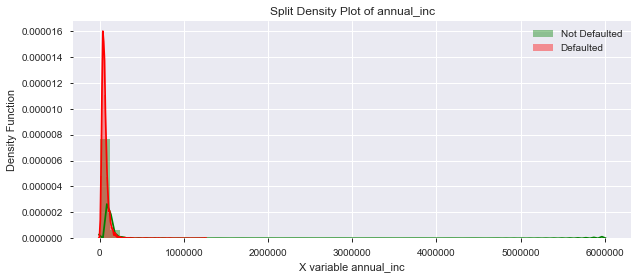

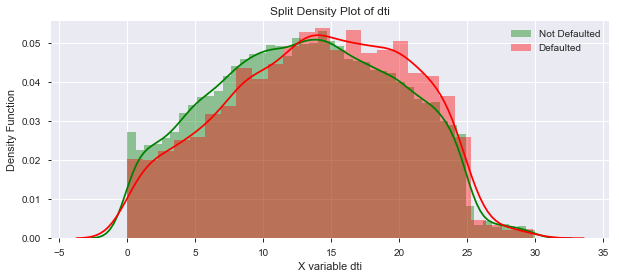

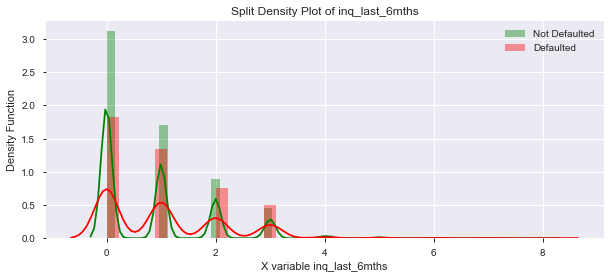

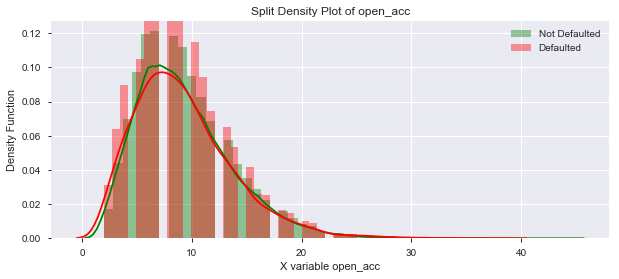

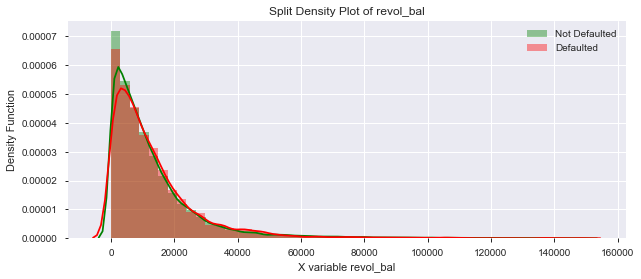

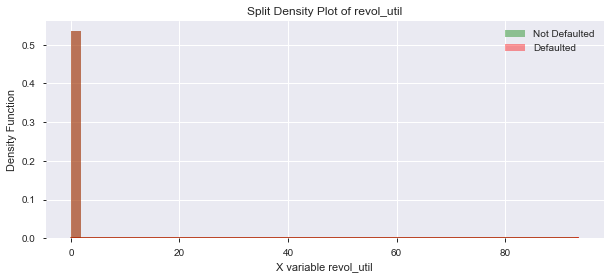

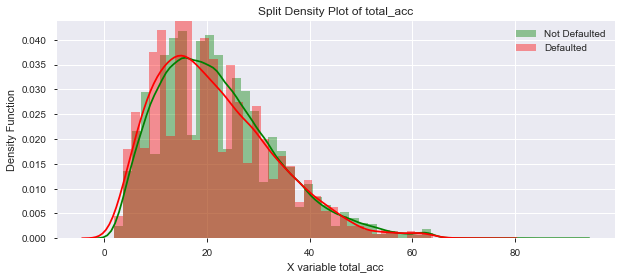

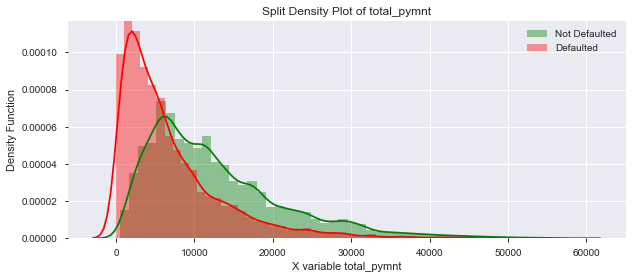

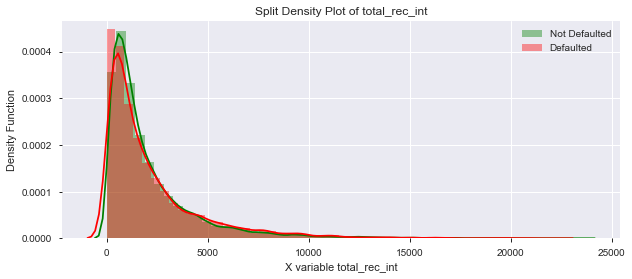

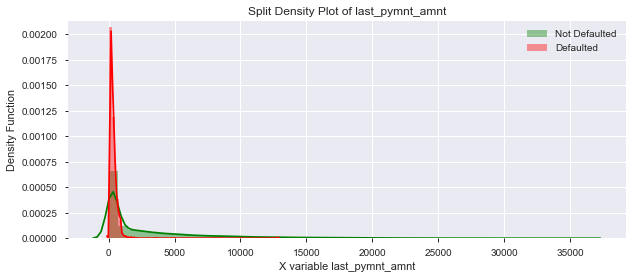

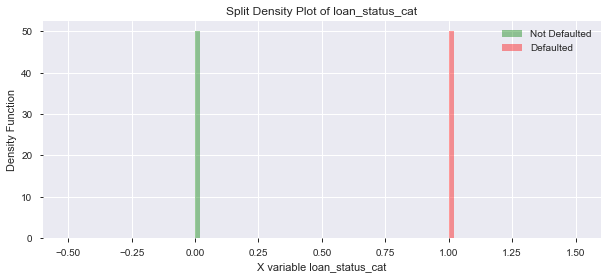

In [57]:
bp = PdfPages('Density Plots with Split.pdf')

for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.distplot(loan_work[loan_work['loan_status_cat']==0][num_variable], label='Not Defaulted', color='g', hist=True, norm_hist=False)
    sns.distplot(loan_work[loan_work['loan_status_cat']==1][num_variable], label='Defaulted', color='r', hist=True, norm_hist=False)
    plt.xlabel(str("X variable ") + str(num_variable) )
    plt.ylabel('Density Function')
    plt.title(str('Split Density Plot of ')+str(num_variable))
    plt.legend()
    bp.savefig(fig)

bp.close()

In [60]:
loan_work[num_list].nunique()

loan_amnt            870
term                   2
int_rate             370
annual_inc          5215
dti                 2853
inq_last_6mths         9
open_acc              40
revol_bal          21275
revol_util             2
total_acc             82
total_pymnt        36714
total_rec_int      34025
last_pymnt_amnt    34418
loan_status_cat        2
dtype: int64

In [64]:
loan_work[['loan_amnt','int_rate','annual_inc','dti','open_acc','revol_bal','total_acc','total_pymnt','total_rec_int','last_pymnt_amnt']].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
loan_amnt,38577.0,11047.025430,7348.441646,500.00,3090.000000,5000.000000,6000.000000,7750.000000,9600.000000,11200.000000,14000.000000,16000.000000,21600.00000,3.500000e+04
int_rate,38577.0,11.932219,3.691327,5.42,7.140000,7.900000,9.990000,10.990000,11.710000,12.840000,13.800000,15.210000,16.82000,2.440000e+01
annual_inc,38577.0,68777.973681,64218.681802,4000.00,30000.000000,37196.160000,44500.000000,50004.000000,58868.000000,65004.000000,75000.000000,90000.000000,115000.00000,6.000000e+06
dti,38577.0,13.272727,6.673044,0.00,4.060000,6.910000,9.240000,11.350000,13.370000,15.310000,17.430000,19.710000,22.29000,2.999000e+01
open_acc,38577.0,9.275423,4.401588,2.00,4.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,13.000000,15.00000,4.400000e+01
revol_bal,38577.0,13289.489826,15866.492241,0.00,1099.000000,2787.000000,4569.000000,6528.000000,8762.000000,11391.600000,14729.400000,19617.000000,28972.00000,1.495880e+05
total_acc,38577.0,22.052648,11.425861,2.00,9.000000,12.000000,15.000000,18.000000,20.000000,23.000000,27.000000,31.000000,38.00000,9.000000e+01
total_pymnt,38577.0,11866.970365,8809.856227,0.00,2915.916752,4689.046513,6118.451114,7720.566404,9674.048405,11747.027752,14330.097476,17925.693326,24144.08915,5.856368e+04
total_rec_int,38577.0,2119.243370,2389.499511,0.00,309.522000,531.612000,755.204000,1000.500000,1300.450000,1707.564000,2285.436000,3182.512000,4889.20800,2.356368e+04
last_pymnt_amnt,38577.0,2746.243218,4494.648131,0.00,94.350000,177.404000,264.618000,373.440000,568.260000,1115.036000,2518.128000,4621.854000,8516.18000,3.611520e+04


In [ ]:
#Handling Outliers - Method2 -- will do that tomorrow
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

loan_work[num_list]=loan_work[num_list].apply(lambda x: outlier_capping(x))

In [ ]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


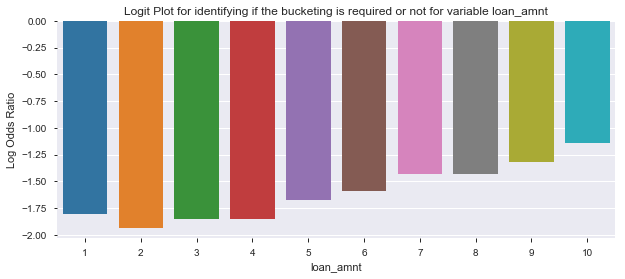

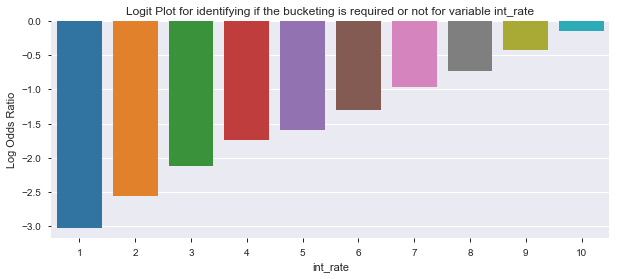

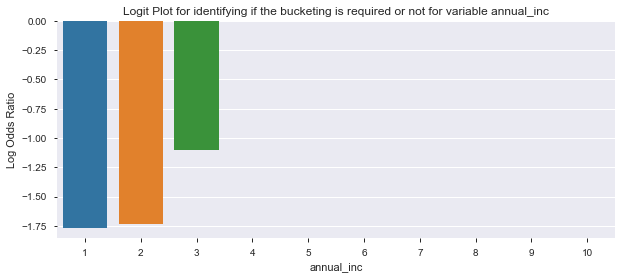

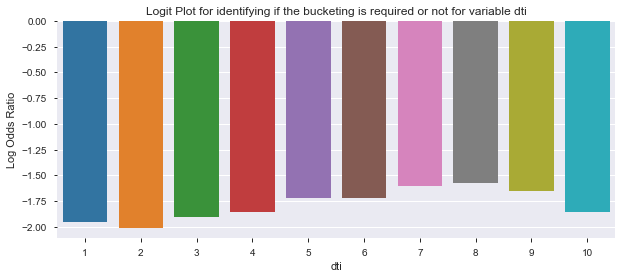

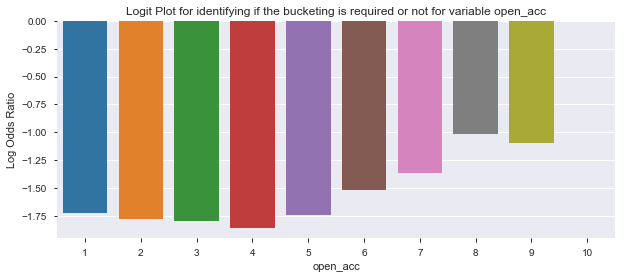

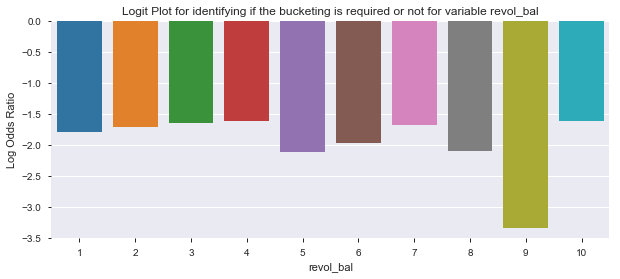

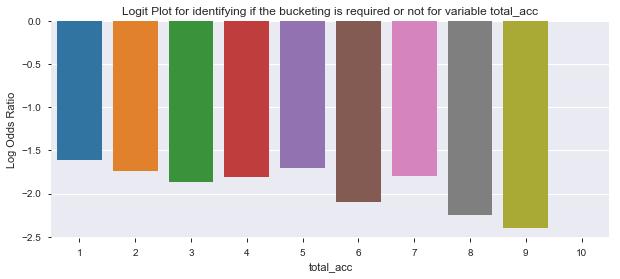

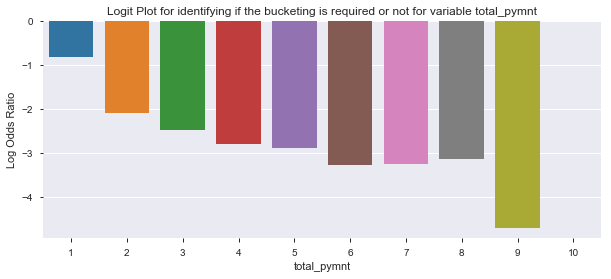

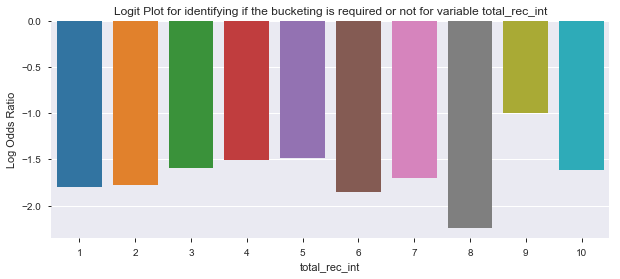

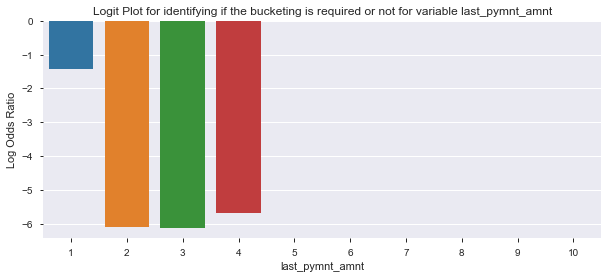

In [66]:
bp = PdfPages('Transformation Plots.pdf')

for num_variable in ['loan_amnt','int_rate','annual_inc','dti','open_acc','revol_bal','total_acc','total_pymnt','total_rec_int','last_pymnt_amnt']:
    binned = pd.cut(loan_work[num_variable], bins=10, labels=list(range(1,11)))
    binned = binned.dropna()
    ser = loan_work.groupby(binned)['loan_status_cat'].sum() / (loan_work.groupby(binned)['loan_status_cat'].count()-loan_work.groupby(binned)['loan_status_cat'].sum())
    ser = np.log(ser)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=ser.index,y=ser)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()


In [41]:
loan_work.nunique()

loan_amnt                870
term                       2
int_rate                 370
grade                      7
sub_grade                 35
emp_length                12
home_ownership             5
annual_inc              5215
verification_status        3
issue_d                   55
purpose                   14
zip_code                 822
addr_state                50
dti                     2853
earliest_cr_line         524
inq_last_6mths             9
open_acc                  40
revol_bal              21275
revol_util                 2
total_acc                 82
total_pymnt            36714
total_rec_int          34025
last_pymnt_d             101
last_pymnt_amnt        34418
last_credit_pull_d       106
loan_status_cat            2
dtype: int64

In [42]:
loan_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
loan_amnt              38577 non-null int64
term                   38577 non-null int64
int_rate               38577 non-null float64
grade                  38577 non-null object
sub_grade              38577 non-null object
emp_length             38577 non-null object
home_ownership         38577 non-null object
annual_inc             38577 non-null float64
verification_status    38577 non-null object
issue_d                38577 non-null object
purpose                38577 non-null object
zip_code               38577 non-null object
addr_state             38577 non-null object
dti                    38577 non-null float64
earliest_cr_line       38577 non-null object
inq_last_6mths         38577 non-null int64
open_acc               38577 non-null int64
revol_bal              38577 non-null int64
revol_util             38577 non-null float64
total_acc              38577 non-null

    ************************** Categorical variables ************************

In [48]:
cat_list

['grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'last_credit_pull_d']

In [50]:
loan_work[cat_list].nunique()

grade                    7
sub_grade               35
emp_length              12
home_ownership           5
verification_status      3
issue_d                 55
purpose                 14
zip_code               822
addr_state              50
earliest_cr_line       524
last_pymnt_d           101
last_credit_pull_d     106
dtype: int64

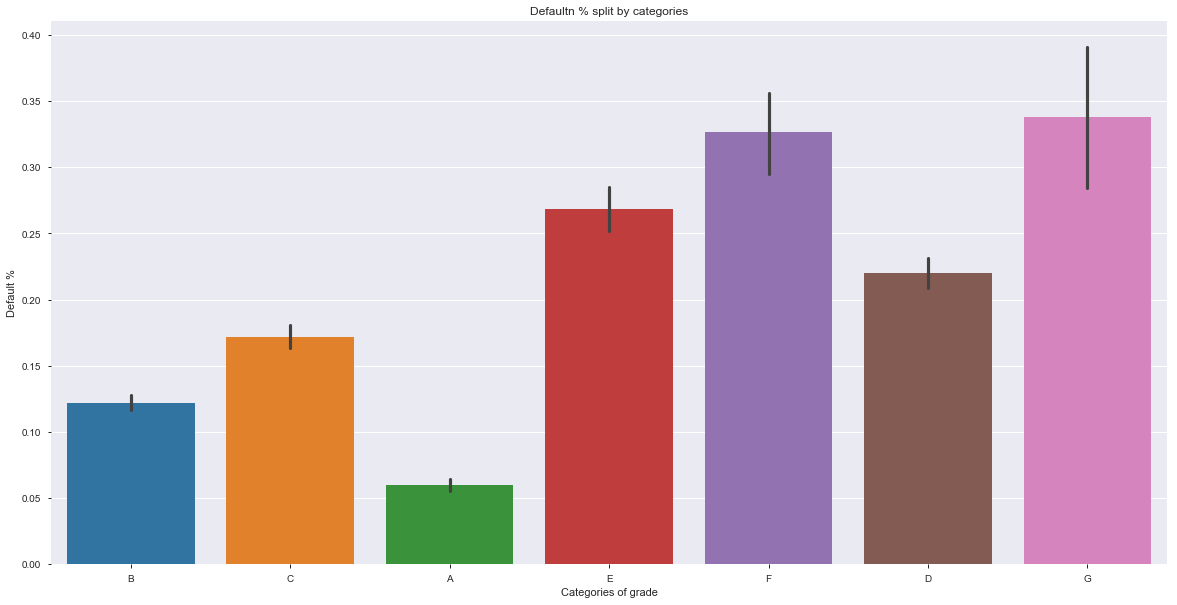

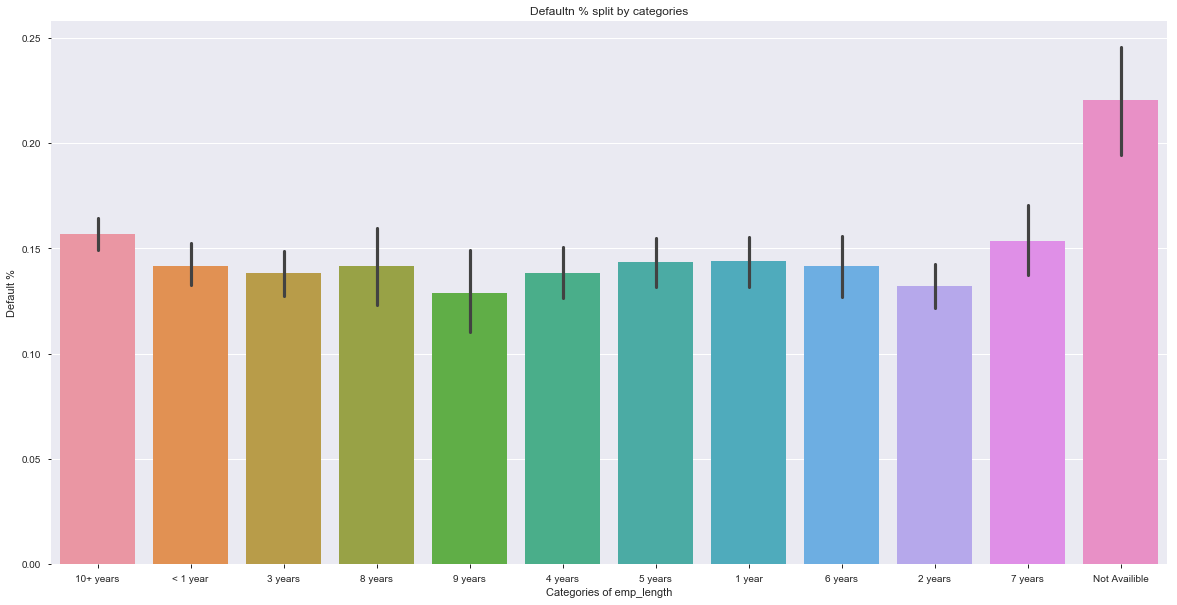

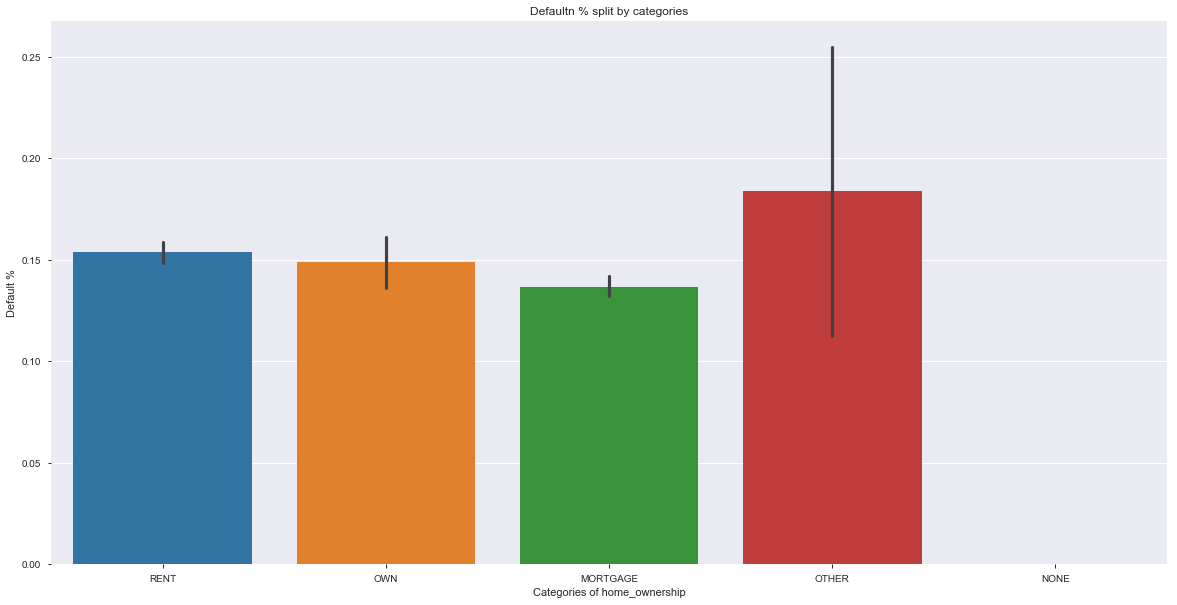

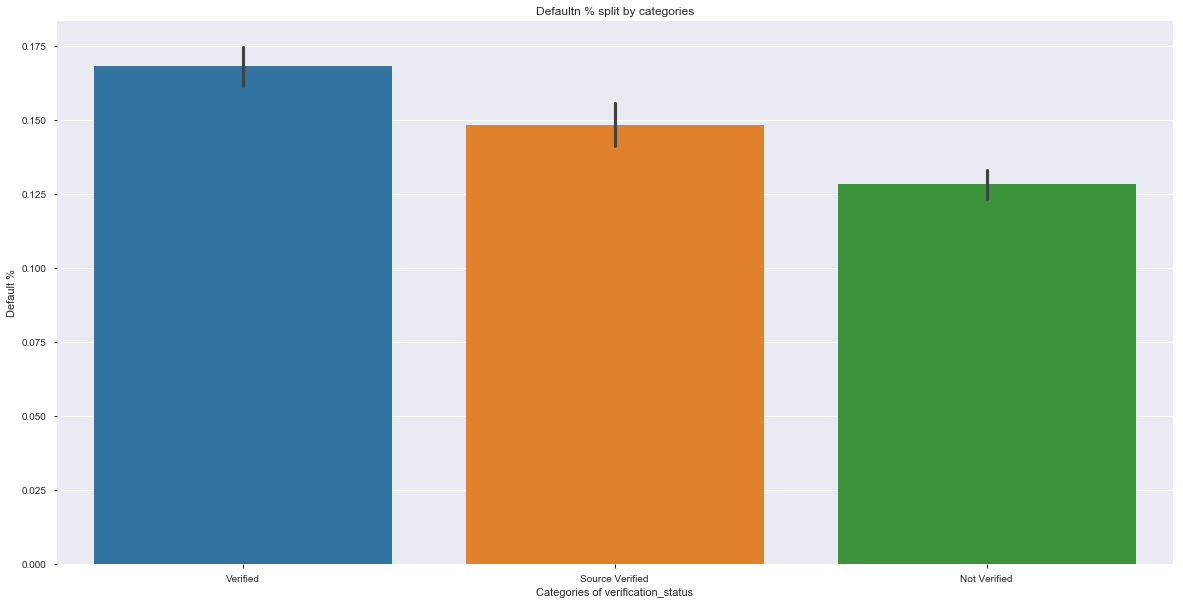

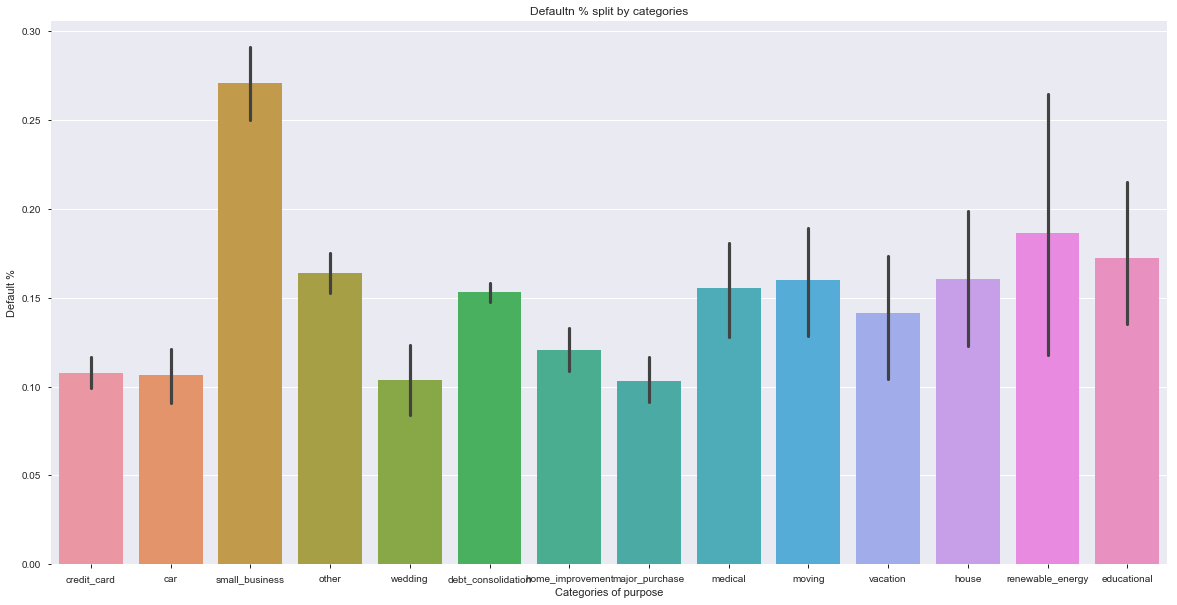

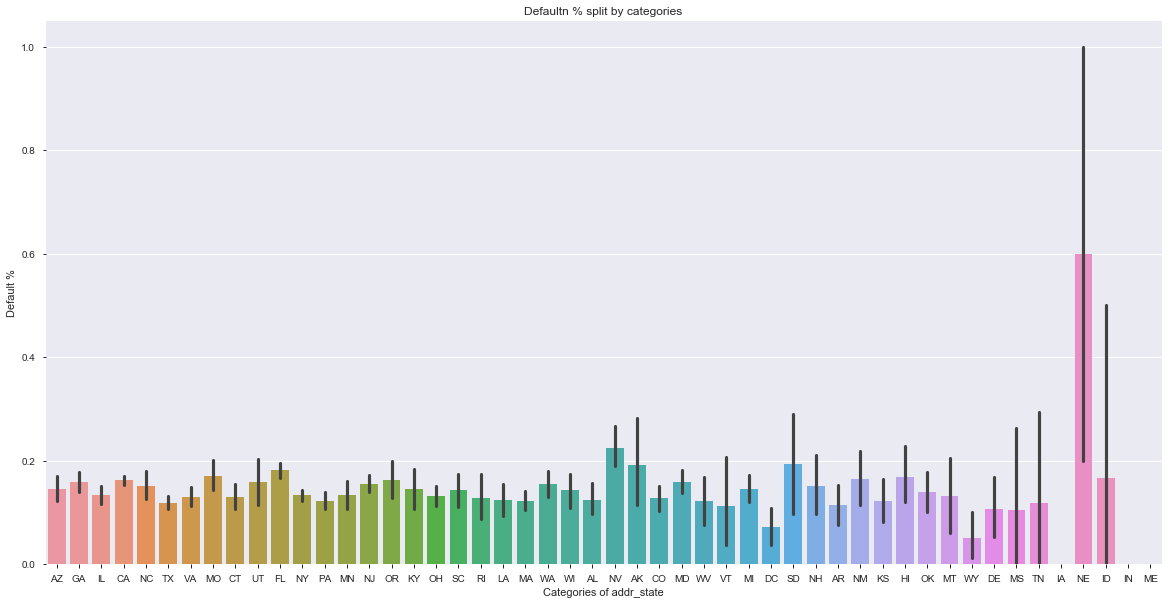

In [55]:
bp = PdfPages('Plots by Categorical Variable.pdf')

for cat_variable in ['grade','emp_length','home_ownership','verification_status','purpose','addr_state']:
    fig,axes = plt.subplots(figsize=(20,10))
    sns.barplot(x=cat_variable,y='loan_status_cat',data=loan_work) 
    plt.ylabel('Default %')
    plt.xlabel(str('Categories of ') + str(cat_variable))
    plt.title('Defaultn % split by categories')
    bp.savefig(fig)

bp.close()

In [76]:
loan_work.pivot_table(values = 'dti', 
                      index = 'grade', 
                      columns = 'loan_status_cat', 
                      aggfunc = 'count')

loan_status_cat,0,1
grade,,
A,9443,602
B,10250,1425
C,6487,1347
D,3967,1118
E,1948,715
F,657,319
G,198,101


In [ ]:
loan_work.pivot_table(values = 'dti', 
                      index = 'inq_last_6mths', 
                      columns = 'loan_status_cat', 
                      aggfunc = 'count')